# Question 2

We'll consider the function $f(x_1, x_2) = 200(x_2 - x_1^2)^2 + (1-x_1)^2$.

In [50]:
# import statements
import numpy as np
from matplotlib import pyplot as plt

In [51]:
def f(x):
    return 200 * (x[1] - x[0] ** 2)**2 + (1 - x[0])**2

def df(x):
    return np.array([-800 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)])

def hf(x):
    return np.array([[2400 * x[0]**2 - 800 * x[1] + 2, -800 * x[0]], [-800 * x[0], 400]])

minimum = np.array([1, 1])
T = 5000

## Part 2A

Write a computer program to run Newton's method on this problem.

In [52]:
def newton(x, mu=1e-1):
    return x - mu * np.linalg.solve(hf(x), df(x))

newton_x_values = []
newton_fx_values = []

x = np.array([0, 0])

for i in range(T):
    newton_x_values.append(np.linalg.norm(x - minimum))
    newton_fx_values.append(f(x) - f(minimum))
    x = newton(x)

## Part 2B

Write a computer program to run Gradient Descent with a fixed step size $\mu=10^{-3}$ on this problem.

In [53]:
def gd(x, mu = 1e-3):
    return x - mu * df(x)

gd_x_values = []
gd_fx_values = []

x = np.array([0, 0])

for i in range(T):
    gd_x_values.append(np.linalg.norm(x - minimum))
    gd_fx_values.append(f(x) - f(minimum))
    x = gd(x)


## Part 2C

Write a computer program to run Gradient Descent with backtracking line- search for this problem (you may set $\beta$ and $\gamma$ as you wish).

In [54]:
def backtrack(x, beta=0.5, gamma=0.8):
    mu = 1e-2
    while f(gd(x, mu)) > f(x) - gamma * mu * np.linalg.norm(df(x))**2:
        mu *= beta
    return mu

gdb_x_values = []
gdb_fx_values = []

x = np.array([0, 0])

for i in range(T):
    gdb_x_values.append(np.linalg.norm(x - minimum))
    gdb_fx_values.append(f(x) - f(minimum))
    mu = backtrack(x)
    x = gd(x, mu)

## Part 2D

Starting at the same $x^{(0)}$, run each of the three algorithms and plot $\|
	x^{(t)} - x^*\|$ for each, in the same figure. In a separate figure, plot
	$f(x^{(t)}) - f(x^*)$ for each of them. Comment on the performance. Note that
	$x^* = (1,1)$ for this problem.

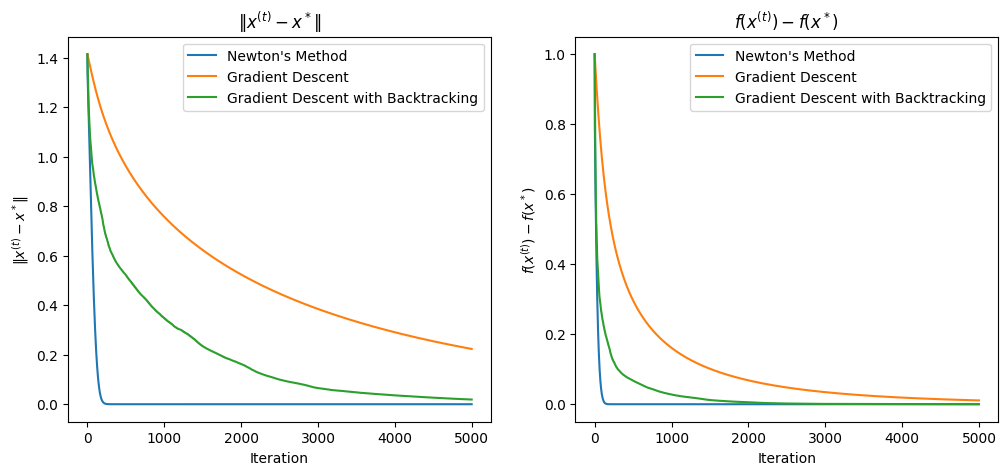

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(T), newton_x_values, label='Newton\'s Method')
plt.plot(range(T), gd_x_values, label='Gradient Descent')
plt.plot(range(T), gdb_x_values, label='Gradient Descent with Backtracking')
plt.xlabel('Iteration')
plt.ylabel(r'$\|x^{(t)} - x^*\|$')
plt.legend()
plt.title(r'$\|x^{(t)} - x^*\|$')

plt.subplot(1, 2, 2)
plt.plot(range(T), newton_fx_values, label='Newton\'s Method')
plt.plot(range(T), gd_fx_values, label='Gradient Descent')
plt.plot(range(T), gdb_fx_values, label='Gradient Descent with Backtracking')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^{(t)}) - f(x^*)$')
plt.legend()
plt.title(r'$f(x^{(t)}) - f(x^*)$')

plt.show()

### Comment

Newton's Method converges significantly faster than the other two and has
significantly lower runtime compare to gradident descent with backtracking.
Gradident descent with backtracking performs better than the ordinary gradient
descent.